In [0]:
import tensorflow as tf

In [0]:
@tf.function
def f(x):
  return tf.reduce_sum(x)

In [0]:
result=f(tf.range(10))

In [6]:
result

<tf.Tensor: shape=(), dtype=int32, numpy=45>

In [0]:
@tf.function
def f(N):
  return tf.reduce_sum((tf.range(N))**2)

In [16]:
f(3)

<tf.Tensor: shape=(), dtype=int32, numpy=5>

In [17]:
f(10)

<tf.Tensor: shape=(), dtype=int32, numpy=285>

In [0]:
result=f(10)

In [23]:
result**2

<tf.Tensor: shape=(), dtype=int32, numpy=81225>

In [0]:
@tf.function
def somefunc(input_vector):
  doubled_vector=input_vector*2
  element_wise_cosine=tf.cos(input_vector)
  vector_squares= input_vector**2 - tf.reduce_mean(input_vector) _

In [26]:
tf.shape(tf.Variable([[1,2],[3,4]]))

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([2, 2], dtype=int32)>

In [32]:
tf.random.normal(tf.shape(tf.Variable(
    [
     [1,2],
     [3,4]
    ])))

<tf.Tensor: shape=(2, 2), dtype=float32, numpy=
array([[ 0.89752465, -1.5242363 ],
       [-0.9371203 ,  1.3424087 ]], dtype=float32)>

In [0]:
#x(t)=t-1.5*cos(15t)
#y(t)=t-1.5*sin(16t)

@tf.function
def x(t):
  return t-(1.5*(tf.cos(15*t)))

In [0]:
t=tf.range(5,dtype='float64')

In [39]:
t

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0., 1., 2., 3., 4.])>

In [41]:
x(t)

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([-1.5       ,  2.13953187,  1.76862283,  2.21201702,  5.42861947])>

In [0]:
@tf.function
def y(t):
  return t-(1.5*(tf.sin(16*t)))

In [43]:
y(t)

<tf.Tensor: shape=(5,), dtype=float64, numpy=array([0.        , 1.43185497, 1.17285998, 4.15238199, 2.61996094])>

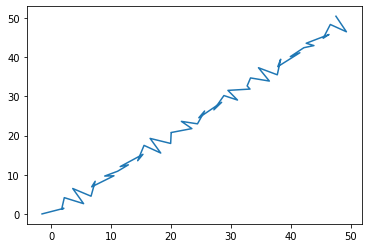

In [50]:
plt.plot(t1,t2)

In [54]:
import numpy as np
np.mean(tf.range(10))

4.5

In [0]:
a_scalar=tf.Variable(10,dtype='float32')

In [56]:
a_scalar

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=10.0>

In [0]:
scalar_squared=a_scalar**2

In [63]:
scalar_squared

<tf.Tensor: shape=(), dtype=float32, numpy=100.0>

##Gradient Tape

In [64]:
x=tf.constant(3.0)

with tf.GradientTape() as g:
  g.watch(x) # monitor operations being performed on the tensor x
  y=x*x

dy_dx=g.gradient(y,x) #f(3) where f is 2*x
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


In [0]:
x=tf.constant(3.0)

with tf.GradientTape() as g:
  g.watch(x)
  with tf.GradientTape() as gg:
    gg.watch(x) # the variable with repect to which you want to find the derivative
    y=x*x
  dy_dx=gg.gradient(y,x) #dy/dx f(x)=x**2 => f'(x)=2x

d2y_dx2=g.gradient(dy_dx,x) # f'(x)=2x => f''(x)=2
#we use nested gradient tapes for higher order derivatives

In [67]:
d2y_dx2

<tf.Tensor: shape=(), dtype=float32, numpy=2.0>

In [0]:
x=tf.Variable([2,3,4],dtype='float32')

with tf.GradientTape(persistent=True) as g:
  g.watch(x)
  with tf.GradientTape(persistent=True) as gg:
    gg.watch(x)
    y=x**2
  dy_dx=gg.gradient(y,x)
d2y_dx2=g.gradient(dy_dx,x)

In [75]:
dy_dx

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([4., 6., 8.], dtype=float32)>

In [76]:
d2y_dx2

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([2., 2., 2.], dtype=float32)>

In [77]:
g

In [78]:
gg

In [0]:
del g
del gg # dropping references to the persisitent tapes

In [0]:
my_scalar=tf.Variable(3,'float32')
my_vector=tf.random.normal([10])

In [85]:
my_vector

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([-0.41190806,  0.86358815, -0.15963137,  0.59928006, -2.453565  ,
        0.327265  , -1.2630272 , -2.1707337 ,  2.012929  ,  1.7796715 ],
      dtype=float32)>

In [86]:
my_scalar

<tf.Variable 'Variable:0' shape=() dtype=int32, numpy=3>

In [0]:
y_guess = tf.Variable(np.zeros(2, dtype='float32'))
y_true = tf.range(1, 3, dtype='float32')

loss = tf.reduce_mean((y_guess - y_true)**2) # mean squared error

In [89]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [0]:
optimizer=tf.optimizers.SGD(learning_rate=0.01,momentum=0.9)

In [99]:
help(optimizer.minimize)

Help on method minimize in module tensorflow.python.keras.optimizer_v2.optimizer_v2:

minimize(loss, var_list, grad_loss=None, name=None) method of tensorflow.python.keras.optimizer_v2.gradient_descent.SGD instance
    Minimize `loss` by updating `var_list`.
    
    This method simply computes gradient using `tf.GradientTape` and calls
    `apply_gradients()`. If you want to process the gradient before applying
    then call `tf.GradientTape` and `apply_gradients()` explicitly instead
    of using this function.
    
    Args:
      loss: A callable taking no arguments which returns the value to minimize.
      var_list: list or tuple of `Variable` objects to update to minimize
        `loss`, or a callable returning the list or tuple of `Variable` objects.
        Use callable when the variable list would otherwise be incomplete before
        `minimize` since the variables are created at the first time `loss` is
        called.
      grad_loss: Optional. A `Tensor` holding the gradi

In [0]:
@tf.function
def loss(prediction,ground_truth):
  return tf.reduce_sum((prediction-ground_truth)**2)

In [106]:
loss(y_guess,y_true)

<tf.Tensor: shape=(), dtype=float32, numpy=5.0>